# 多自由度系の固有値解析

吉田勝俊（宇都宮大学）

## 参考情報
- [Pythonで運動方程式を解く(odeint) - Qiita](https://qiita.com/binaryneutronstar/items/ad5efa27fd626826846f)
- [[Python] Numpyの参照、抽出、結合 - Qiita](https://qiita.com/supersaiakujin/items/d63c73bb7b5aac43898a)
- [【Python】行列指数関数・行列対数関数 - Qiita](https://qiita.com/Mrrmm252/items/a50a9b352e5064e40cc1)

In [1]:
%matplotlib inline

import numpy as np                 #数値計算ライブラリ
from scipy.integrate import odeint #常微分方程式ライブラリ
import scipy.linalg as la          #線形代数ライブラリ
import matplotlib.pyplot as plt    #描画ライブラリ
plt_config = {
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'lines.linewidth': 1.2,
    'lines.markersize': 3,
    'lines.markeredgewidth': 0.7,
    'lines.markerfacecolor': 'white',
    'lines.markeredgecolor': 'black',
}
plt.rcParams.update(plt_config)

## ◯行列指数関数

### ■指数関数

In [2]:
np.exp(2.5) #普通の指数関数

12.182493960703473

### ■行列指数関数

In [3]:
A = np.array([
    [0, 1],
    [-3, -2]
])
display(A)

array([[ 0,  1],
       [-3, -2]])

#### （誤）Numpy の `exp(行列)` $\neq$ 行列指数関数

In [4]:
np.exp(A) #これは単なる各成分の指数関数値

array([[1.        , 2.71828183],
       [0.04978707, 0.13533528]])

In [5]:
for i in range(2):
    for j in range(2):
        print(np.exp(A[i,j])) 

1.0
2.718281828459045
0.049787068367863944
0.1353352832366127


#### <font color="red">（正）Scipy の `expm(行列)` $=$ 行列指数関数</font>．

In [6]:
la.expm(A)

array([[ 0.31431608,  0.2569476 ],
       [-0.77084281, -0.19957912]])

## ◯解の表示（多次元）

In [7]:
def Simulation(A, x0, time):
    '''
    線形状態方程式 dx/dt = Ax を解く
    by 有限差分法による数値シミュレーション
    '''
    def eom(x, t):
        return A.dot(x)
        
    motion = odeint(
        eom,   #運動方程式を表すユーザ関数
        x0,    #初期条件
        time   #時間軸を表す数列
    )
  
    return motion

def Solution_expA(A, x0, time):
    '''
    線形状態方程式 dx/dt = Ax の解を計算する
    by 行列指数関数による表示 x(t)= exp(tA)x0
    '''
    motion = [] #空のリスト
    for t in time:
        motion.append( #各時刻の解をリストに追加
            la.expm(t*A).dot(x0)
        )
  
    return np.array(motion) #Numpy配列に変換して返す

def plot_sim_vs_expA(A, x0, tminmax=[0,30], tn=200):
    '''
    数値シミュレーション vs 行列指数関数による解のプロット
    '''
    x0 = np.array(x0) #初期値
    ts = np.linspace(*tminmax, tn) #時間軸
    
    xs_sim  = Simulation(A, x0, ts)
    xs_expA = Solution_expA(A, x0, ts)
    
    fig, ax = plt.subplots(2,1,figsize=(6,4))

    for i in range(2):
        ax[i].plot(ts, xs_sim[:,i], 'o', 
                label=r'Simulation')
        ax[i].plot(ts, xs_expA[:,i], '-', 
                label=r'$e^{tA}x_0$')
        ax[i].legend()
        ax[i].set_xlabel(r'$t$')
        ax[i].set_ylabel(r'$x_%d$'%(i+1))

### 演習 9.1 ( 線形振動系の解の表示 )

- 状態方程式: $\displaystyle
\dot{\boldsymbol{x}} = A\boldsymbol{x}
,\quad
\boldsymbol{x}(0)=\boldsymbol{x}_0
,\quad
A:=\begin{bmatrix}
0 & 1\\
-k/m & -c/m
\end{bmatrix}
$
- 行列指数関数による解の表示: $\boldsymbol{x}(t)=e^{tA}\boldsymbol{x}_0$

In [8]:
def A_L1DOF(param):
    '''
    線形1自由度（linear 1-degree-of-freedom）
    の振動系を表す行列
    '''
    m, c, k = param  #パラメータの成分
    A = np.array([
        [0, 1],
        [-k/m, -c/m],
    ])
    
    return A

#### ■数値例

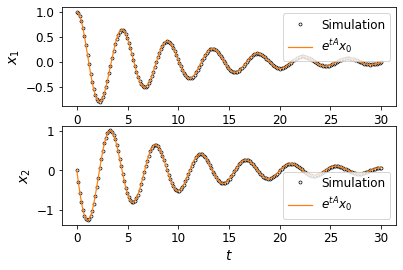

In [9]:
param, x0 = [1, 0.2, 2], [1,0]

plot_sim_vs_expA(A_L1DOF(param), x0)

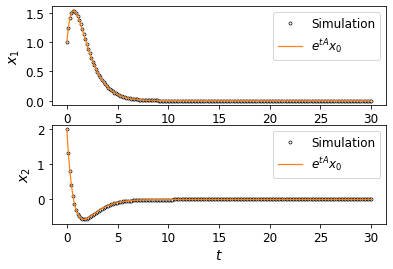

In [10]:
param, x0 = [1, 2, 1], [1,2] #ちなみに固有値が重根の場合

plot_sim_vs_expA(A_L1DOF(param), x0)

#### ■比較結果

- シミュレーションと $e^{tA}\boldsymbol{x}_0$ の結果は，パラメータや初期値を変えても一致します！

## ◯固有値と固有ベクトル

### 演習 9.3 ( 振動と行列の固有値の数値計算 )

#### ■$s^2 + 3s + 2 = 0$ の根

In [11]:
np.roots([1, 3, 2])

array([-2., -1.])

#### ■行列 $\begin{bmatrix}0&1\\-2&-3\end{bmatrix}$ の固有値

In [12]:
B = np.array([
    [ 0,  1],
    [-2, -3]
])

固有値 $s_i$ と固有ベクトル $\boldsymbol{v}_i$ を求めます
- `ss`: $\boldsymbol{s}:=[s_1,\cdots,s_n]$ 固有値を並べた配列 
- `U`: $U:=[\boldsymbol{u}_1,\cdots,\boldsymbol{u}_n]$ 単位固有ベクトルを並べた行列

In [13]:
ss, U = la.eig(B)

print(ss)

[-1.+0.j -2.+0.j]


固有方程式と同じ固有値が得られました．

- <font color='red'>2次方程式の根と順序が違いますが，これは単に`roots`と`eig`の仕様（結果の並べ方）の違いです．</font>
- 行列の固有値には虚部 `0.j` = 0 が見えてますが，これも単なる仕様の問題です．

固有値とその単位固有ベクトルを並べて表示してみます．

In [14]:
for i, s in enumerate(ss):
    u = U[:,i] #固有ベクトル＝計算結果の列ベクトル
    print( 's =', s, ': u =', u)

s = (-1+0j) : u = [ 0.70710678 -0.70710678]
s = (-2+0j) : u = [-0.4472136   0.89442719]


例題9.3の手計算の結果 $s=-1:\boldsymbol{v}=(1,-1)^T$，$s=-2:\boldsymbol{v}=(1,-2)^T$ と比較すると，
- 同じ固有値が得られている．
- スカラ倍の違いを除き，同じ固有ベクトルが得られている．

## ◯複素共役による実数化

### 演習 9.4 ( 初期値の展開の数値計算 )

In [15]:
A = np.array([ #固有値が複素数になるような行列
    [0, 1],
    [-1, -1]
])

#### ■固有値と単位固有ベクトル

In [16]:
ss, U = la.eig(A)

#uu1 = np.array([U[:,i] for i in range(len(ss))]) #列ベクトルが固有ベクトル
uu = U.transpose() #上記よりシンプルな等価処理

for s, u in zip(ss, uu):
    print('s =', s, ': u =', u)

s = (-0.49999999999999994+0.8660254037844385j) : u = [ 0.70710678+0.j         -0.35355339+0.61237244j]
s = (-0.49999999999999994-0.8660254037844385j) : u = [ 0.70710678-0.j         -0.35355339-0.61237244j]


- 固有値・固有ベクトルが，確かに，共役複素数のペアで得られている

#### ■初期値の展開係数

In [17]:
x0 = np.array([5, 6]) #適当な初期値

In [18]:
etas = la.inv(U).dot(x0) #初期値の展開係数
print(etas)

[3.53553391-6.94022094j 3.53553391+6.94022094j]


- 展開係数も，共役複素数のペアになっている

#### ■初期値の復元（実数化）

In [19]:
dim = len(ss) #次元

x0_rec = np.zeros(dim) #ゼロベクトル
for eta, u in zip(etas, uu): #展開係数*固有ベクトル の線形結合
    x0_rec = x0_rec + eta*u  

print(x0_rec)

[5.+0.0000000e+00j 6.-8.8817842e-16j]


- 虚部の計算機誤差$\approx -8\times 10^{-16}$ を除けば，元の実数ベクトル `[5,6]` が復元されている．

#### ■微小な計算機誤差を除去する処理を追加 ※見づらいので

In [20]:
def chop(array):
    '''
    微小な計算機誤差を除去する
    '''
    tol = 1e-10 #許容誤差（微小な数）

    #実部
    re = np.real(array)
    re[np.abs(re)<tol] = 0 #tol以下の項を0に

    #虚部
    if np.iscomplexobj(array):
        im = np.imag(array)
        im[np.abs(im)<tol] = 0 #tol以下の項を0に
    else:
        im = np.zeros_like(re)
    
    return re + 1j*im

chop(x0_rec)

array([5.+0.j, 6.+0.j])

## ◯固有値によるダイナミクスの分類

In [21]:
def plot_multidim(ts, xs):
    '''
    多次元の解をプロットする
    '''
    tn, dim = np.shape(xs)

    fig, ax = plt.subplots(1,1,figsize=(6,2))

    ax.plot(ts, xs, '-')
    ax.set_xlabel(r'$t$')
    ax.set_ylabel(r'$x_i$')

    labels = [r'$x_%d$'%(i+1) for i in range(dim)]
    ax.legend(labels=labels, loc='lower right')
    ax.grid()

### 演習 9.5 ( モード展開の数値計算 )

In [22]:
A = np.array([ #お試し用の行列
    [  0,   1,  0,  0],
    [0.1, 0.1,  0,  0],
    [  0,   0,  0,  1],
    [  0,   0, -1, -1],
])

#### 固有値と単位固有ベクトル

In [23]:
ss, U = la.eig(A)
uu = U.transpose()

for s, u in zip(chop(ss), chop(uu)):
    print('s =', s)
    print(': u =', u)
    print('----------')

s = (-0.2701562118716424+0j)
: u = [-0.96539112+0.j  0.26080641+0.j  0.        +0.j  0.        +0.j]
----------
s = (0.3701562118716425+0j)
: u = [-0.93781416+0.j -0.34713774+0.j  0.        +0.j  0.        +0.j]
----------
s = (-0.49999999999999994+0.8660254037844385j)
: u = [ 0.        +0.j          0.        +0.j          0.70710678+0.j
 -0.35355339+0.61237244j]
----------
s = (-0.49999999999999994-0.8660254037844385j)
: u = [ 0.        +0.j          0.        +0.j          0.70710678+0.j
 -0.35355339-0.61237244j]
----------


- (負の実根, 正の実根，複素数，その共役）が得られました．
- 共役な複素根に対しては，共役な複素固有ベクトルが得られています．

#### 初期値の展開係数

In [24]:
x0 = np.array([1, -1, 2, 4]) #適当な初期値

In [25]:
etas = la.inv(U).dot(x0) #初期値の展開係数

for eta in chop(etas):
    print(eta)

(-2.2165363367186606+0j)
(1.215405516872803+0j)
(1.414213562373095-4.082482904638631j)
(1.4142135623730954+4.082482904638631j)


- 共役な固有ベクトルに掛かる展開係数は，やはり共役になっています．

#### 時間軸

In [26]:
ts = np.linspace(0,10,200) #時間軸

#### ■「（a）実根 < 0」の成分

In [27]:
ss[0]

(-0.2701562118716424+0j)

In [28]:
xa_minus = np.array([
    etas[0]*np.exp(ss[0]*t)*uu[0]
    for t in ts
])

xa_minus = chop(xa_minus) #計算機誤差の除去

虚部の大きさを確認

In [29]:
print('size of imaginary = ', la.norm(np.imag(xa_minus)))

size of imaginary =  0.0


虚部は0なので，実部だけプロット

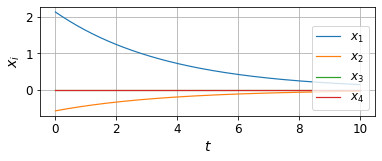

In [30]:
plot_multidim(ts, np.real(xa_minus))

- 負の実根に対応する，非振動減衰が見て取れます．

#### ■「（a）実根 > 0」の成分

In [31]:
ss[1]

(0.3701562118716425+0j)

In [32]:
xa_plus = np.array([
    etas[1]*np.exp(ss[1]*t)*uu[1]
    for t in ts
])

xa_plus = chop(xa_plus) #計算機誤差の除去

虚部の大きさを確認しながらプロット

size of imaginary =  0.0


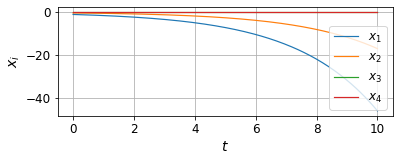

In [33]:
print('size of imaginary = ', la.norm(np.imag(xa_plus)))
plot_multidim(ts, np.real(xa_plus))

- 正の実根に対応する，非振動発散が見られます．

#### ■「（c）共役な複素根」の成分

In [34]:
ss[2], ss[3]

((-0.49999999999999994+0.8660254037844385j),
 (-0.49999999999999994-0.8660254037844385j))

In [35]:
xc = np.array([
    etas[2]*np.exp(ss[2]*t)*uu[2] + etas[3]*np.exp(ss[3]*t)*uu[3]
    for t in ts
])

xc = chop(xc) #計算機誤差の除去

虚部の大きさを確認しながらプロット

size of imaginary =  0.0


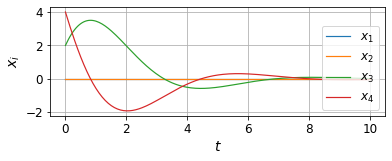

In [36]:
print('size of imaginary = ', la.norm(np.imag(xc)))
plot_multidim(ts, np.real(xc))

- 実部が負の共役な複素根に対応する減衰振動が見て取れます．

#### ■楕円軌道の公式の検証

In [37]:
def EE(omt, u, eta):
    '''
    楕円軌道の公式
    '''
    etaR,  etaI  = np.real(eta), np.imag(eta)
    uR,    uI    = np.real(u),   np.imag(u)
    Ec =  2*(etaR*uR - etaI*uI)
    Es = -2*(etaI*uR + etaR*uI)
    
    return np.cos(omt)*Ec + np.sin(omt)*Es 

In [38]:
s, u, eta = ss[2], uu[2], etas[2]
gamma, omega = np.real(s), np.imag(s)

xc_E = np.array([
    np.exp(gamma*t)*EE(omega*t, u, eta)
    for t in ts
])

diff_xc = chop(xc - xc_E) #共役複素数の成分と公式との差
print('difference = ', la.norm(diff_xc))

difference =  0.0


- 公式は合ってます．

#### ■（ｄ）異なるダイナミクスの総和

In [39]:
ss[0], ss[1], ss[2], ss[3]

((-0.2701562118716424+0j),
 (0.3701562118716425+0j),
 (-0.49999999999999994+0.8660254037844385j),
 (-0.49999999999999994-0.8660254037844385j))

In [40]:
xsum = xa_minus + xa_plus + xc #全ての総和
# xsum = np.array([ #改めて総和し直す書き方　※上記と等価
#     sum(etas[i]*np.exp(ss[i]*t)*uu[i] for i in range(len(ss)))
#     for t in ts
# ])

xsum = chop(xsum) #計算機誤差の除去

虚部の大きさを確認しながらプロット

size of imaginary =  0.0


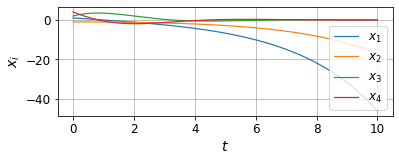

In [41]:
print('size of imaginary = ', la.norm(np.imag(xsum)))
plot_multidim(ts, np.real(xsum))

- $\boldsymbol{x}(t)=$ （全成分の総和）のプロットです．
- 「（a）実根 > 0」成分の発散が勝って，$\boldsymbol{x}(t)$は全体としては発散します．